In [76]:
from sdRDM import DataModel
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

from CaliPytion.tools.standardcurve import StandardCurve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
test_data, lib = DataModel.parse(path="linear_test.json")
test_data

Calibration(id='calibration0', reactant_id='s0', date=datetime.datetime(2023, 3, 14, 0, 0), pH=7.0, temperature=25.0, temperature_unit='C', device=Device(id='device0', manufacturer='IBTB', model='photo 3000', software_version=None), standard=[Standard(id='standard0', wavelength=420.0, concentration=[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0], concentration_unit='umole / l', absorption=[Series(id='series0', values=[0.2, 0.6000000000000001, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0000000000000004]), Series(id='series0', values=[0.33, 1.23, 2.13, 3.03, 3.9299999999999997, 4.83, 5.7299999999999995, 6.63])])], spectrum=Spectrum(id='spectrum0', concentration=2.0, wavelength=[300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0, 400.0], concentration_unit='umole / l', absorption=[Series(id='series1', values=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])]), result=None)

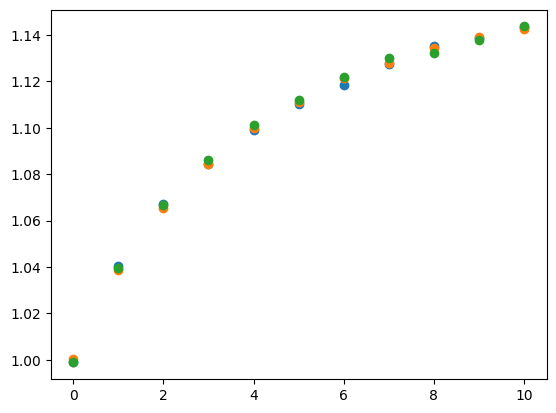

In [78]:
def poly(x,a,b,c):
    return a*x / (b+x)

a=0.2
b=4
c=2

conc = np.linspace(0,10,11)
abso = poly(x = conc,a=a,b=b,c=c)
data = np.tile(abso, 3).reshape((3,len(conc)))

for i in range(len(data)):
    data[i] = data[i] + np.random.normal(1,0.001, len(conc))

for d in data:
    plt.scatter(conc,d)

In [82]:
standard = lib.Standard(wavelength=420, concentration=list(conc),
                        conc_unit="mmole / l",
                        absorption = [lib.Series(values=x.tolist()) for x in data])

calibration = lib.Calibration(reactant_id="s0", pH=7, temperature=37,
                              temperature_unit="C", standard=[standard])
calibration.xml()

'<?xml version=\'1.0\' encoding=\'UTF-8\'?>\n<Calibration id="calibration12" repo="https://github.com/FAIRChemistry/CaliPytion.git" commit="7c30255582b4c5426d341ff162de2693d5eb3e88" url="https://github.com/FAIRChemistry/CaliPytion/tree/7c30255582b4c5426d341ff162de2693d5eb3e88">\n  <ReactantId>s0</ReactantId>\n  <pH>7.0</pH>\n  <temperature>37.0</temperature>\n  <TemperatureUnit>C</TemperatureUnit>\n  <standard>\n    <Standard id="standard12">\n      <wavelength>420.0</wavelength>\n      <concentration>\n        <concentration>0.0</concentration>\n        <concentration>1.0</concentration>\n        <concentration>2.0</concentration>\n        <concentration>3.0</concentration>\n        <concentration>4.0</concentration>\n        <concentration>5.0</concentration>\n        <concentration>6.0</concentration>\n        <concentration>7.0</concentration>\n        <concentration>8.0</concentration>\n        <concentration>9.0</concentration>\n        <concentration>10.0</concentration>\n      

In [84]:

with open("rational_test.xml", "w") as f:
    f.write(calibration.xml())

Found calibration data at 420.0 nm
Standard curve data was blanked.
{'a': 0.01735453914903363}
-248.15572466443166


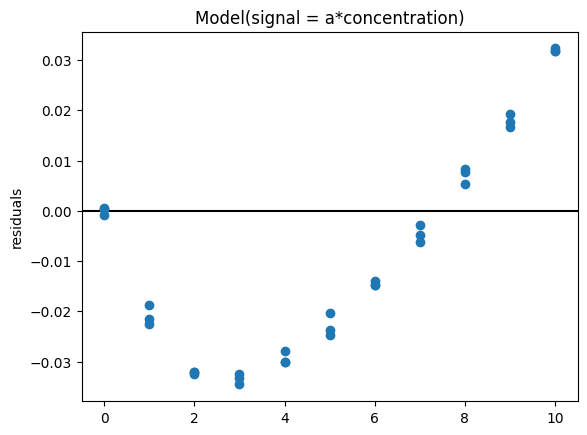

{'b': 0.03167904812670183, 'a': -0.0018231193250417875}
-332.40213917097196


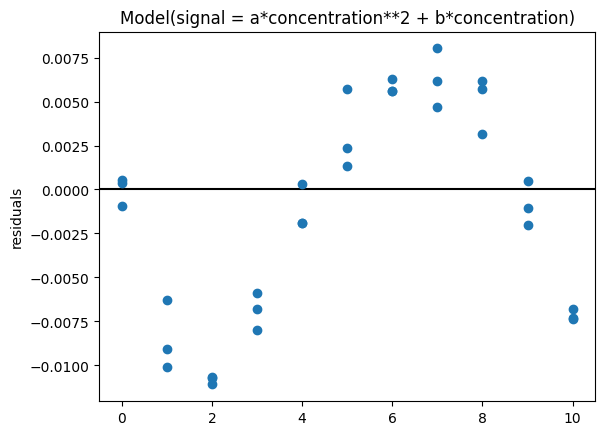

{'b': -0.004728795105307854, 'c': 0.04076991390128202, 'a': 0.00020880613872345212}
-403.6905685593893


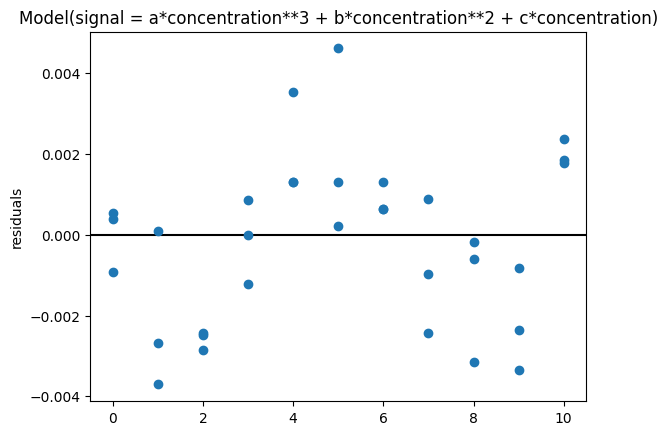

{'b': 0.10000000010452266, 'a': 2.652391592581052e-16}
4157.720064536108


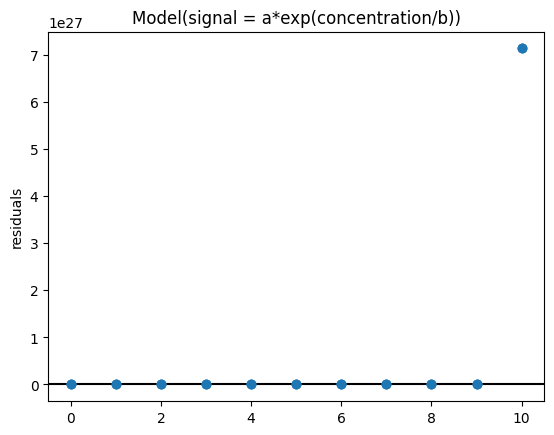

{'b': 4.040719046326866, 'a': 0.19904693244006372}
-436.73068675448735


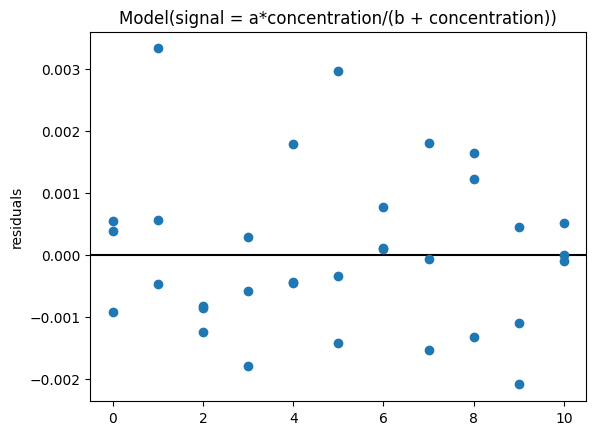

In [ ]:
standard_curve = StandardCurve.from_datamodel(calibration)

for model in standard_curve.models.values():
    print(model.params)
    print(model.aic)
    model.visualize_residuals()
    plt.show()

In [ ]:
standard_curve.calculate_concentration([0.1,2,3,4])

3 measurements are above upper calibration limit of 0.14.
                       Respective measurments are replaced with nans. To extrapolate set 'allow_extrapolation' = True


TypeError: only size-1 arrays can be converted to Python scalars